In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
datos = pd.read_csv('../../output/data/Casen2022_proc.csv')
datos

,sexo,sexo_str,edad,edad_tr,sexo_edad,region,region_str,educa,educa_str,ingreso,...,temporada_trabajo,temporada_trabajo_str,rol_laboral,rol_laboral_str,tipoContrato,tipoContrato_str,jornadaLaboral,jornadaLaboral_str,tipoHorario,tipoHorario_str
0,1,Mujer,72,Adultos mayores,Mujer mayor,16,Región de Ñuble,1.0,Educación Basica,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Hombre,67,Adultos mayores,Hombre mayor,16,Región de Ñuble,1.0,Educación Basica,NaN,...,3.0,Ocasional o eventual,2.0,Trabajador(a) por cuenta propia,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Mujer,40,Adultos,Mujer adulta,16,Región de Ñuble,4.0,Técnica completa,NaN,...,NaN,NaN,5.0,Empleado(a) u obrero(a) del sector privado,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Hombre,56,Adultos,Hombre adulto,16,Región de Ñuble,1.0,Educación Basica,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Mujer,25,Jovenes,Mujer joven,16,Región de Ñuble,2.0,Educación Media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158504,1,Mujer,47,Adultos,Mujer adulta,9,Región de La Araucanía,6.0,Universitaria completa,1200000.0,...,1.0,Permanente,3.0,Empleado(a) u obrero(a) del sector público (Go...,1.0,Plazo indefinido,1.0,Jornada completa,1.0,Solo diurno
158505,1,Mujer,41,Adultos,Mujer adulta,9,Región de La Araucanía,6.0,Universitaria completa,1400000.0,...,1.0,Permanente,3.0,Empleado(a) u obrero(a) del sector público (Go...,1.0,Plazo indefinido,1.0,Jornada completa,1.0,Solo diurno
158506,0,Hombre,46,Adultos,Hombre adulto,9,Región de La Araucanía,6.0,Universitaria completa,2000000.0,...,1.0,Permanente,5.0,Empleado(a) u obrero(a) del sector privado,1.0,Plazo indefinido,1.0,Jornada completa,1.0,Solo diurno
158507,1,Mujer,31,Jovenes,Mujer joven,9,Región de La Araucanía,4.0,Técnica completa,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Generamos variable de ocupación en el conjunto datos
datos['activ'] = np.where((datos['o1'] == 1) | (datos['o2'] == 1) | (datos['o3'] == 1), 1, 0)

# Generamos DataFrame data de personas ocupadas
data = datos.query('activ == 1').dropna(subset=['ingreso']).copy()

## Revisión de variables 

Comparar entre ENE y CASEN las distintas variables para evaluar la distribución de ambas encuestas en porcentajes y cantidades y asegurar que son comparables entre sí y que una podría explicar la otra.

Se comparan:

- Longitud de datos
- edad
- edad por tramos
- sexo
- region
- nivel educacional

In [4]:
print(data.columns, '\n\n',
      data.shape)

Index(['sexo', 'sexo_str', 'edad', 'edad_tr', 'sexo_edad', 'region',
       'region_str', 'educa', 'educa_str', 'ingreso', 'o1', 'o2', 'o3',
       'TrabajaAlgunaVez', 'DisponibleTrabajar', 'Busca4semanas',
       'RazonNoEmpleo', 'hrs_sem', 'temporada_trabajo',
       'temporada_trabajo_str', 'rol_laboral', 'rol_laboral_str',
       'tipoContrato', 'tipoContrato_str', 'jornadaLaboral',
       'jornadaLaboral_str', 'tipoHorario', 'tipoHorario_str', 'activ'],
      dtype='object') 

 (59644, 29)


In [5]:
data['edad'].describe()

count    59644.000000
mean        41.803350
std         13.363736
min         18.000000
25%         31.000000
50%         40.000000
75%         52.000000
max         92.000000
Name: edad, dtype: float64

In [6]:
round((data['sexo_str'].value_counts()/data['sexo_str'].count())*100, 2)

sexo_str
Hombre    54.86
Mujer     45.14
Name: count, dtype: float64

In [7]:
print(data['region_str'].value_counts(), '\n\n')

region_str
Región Metropolitana                12863
Región de Valparaíso                 5870
Región del Biobío                    5628
Región de O'Higgins                  4503
Región del Maule                     4129
Región de La Araucanía               3183
Región de Los Lagos                  3083
Región de Los Ríos                   3020
Región de Antofagasta                2685
Región de Atacama                    2636
Región de Tarapacá                   2383
Región de Arica y Parinacota         2316
Región de Ñuble                      2166
Región de Coquimbo                   2129
Región de Magallanes y Antártica     1845
Región de Aysén                      1205
Name: count, dtype: int64 




In [8]:
print(round((data['region_str'].value_counts()/data['region_str'].count())*100, 2))

region_str
Región Metropolitana                21.57
Región de Valparaíso                 9.84
Región del Biobío                    9.44
Región de O'Higgins                  7.55
Región del Maule                     6.92
Región de La Araucanía               5.34
Región de Los Lagos                  5.17
Región de Los Ríos                   5.06
Región de Antofagasta                4.50
Región de Atacama                    4.42
Región de Tarapacá                   4.00
Región de Arica y Parinacota         3.88
Región de Ñuble                      3.63
Región de Coquimbo                   3.57
Región de Magallanes y Antártica     3.09
Región de Aysén                      2.02
Name: count, dtype: float64


In [9]:
print(data['edad_tr'].value_counts(), '\n\n',
      round((data['edad_tr'].value_counts()/data['edad_tr'].count())*100, 2))

edad_tr
Adultos            28578
Jovenes            28359
Adultos mayores     2707
Name: count, dtype: int64 

 edad_tr
Adultos            47.91
Jovenes            47.55
Adultos mayores     4.54
Name: count, dtype: float64


In [10]:
print(data['sexo_edad'].value_counts(), '\n\n',
      round((data['sexo_edad'].value_counts()/data['sexo_edad'].count())*100, 2))

sexo_edad
Hombre adulto    15530
Hombre joven     15309
Mujer joven      13050
Mujer adulta     13048
Hombre mayor      1880
Mujer mayor        827
Name: count, dtype: int64 

 sexo_edad
Hombre adulto    26.04
Hombre joven     25.67
Mujer joven      21.88
Mujer adulta     21.88
Hombre mayor      3.15
Mujer mayor       1.39
Name: count, dtype: float64


In [11]:
print(data['educa_str'].value_counts(), '\n\n',
      round((data['educa_str'].value_counts()/data['educa'].count())*100, 2))

educa_str
Educación Media             26291
Universitaria completa      11233
Educación Basica             8073
Técnica completa             6284
Universitaria incompleta     1521
Postgrado                    1176
Técnica incompleta           1105
Name: count, dtype: int64 

 educa_str
Educación Media             47.22
Universitaria completa      20.17
Educación Basica            14.50
Técnica completa            11.29
Universitaria incompleta     2.73
Postgrado                    2.11
Técnica incompleta           1.98
Name: count, dtype: float64


In [12]:
(data['sexo_str'] + ' - ' + data['educa_str']).value_counts()

Hombre - Educación Media             15566
Mujer - Educación Media              10725
Mujer - Universitaria completa        6186
Hombre - Educación Basica             5252
Hombre - Universitaria completa       5047
Mujer - Técnica completa              3546
Mujer - Educación Basica              2821
Hombre - Técnica completa             2738
Hombre - Universitaria incompleta      926
Hombre - Técnica incompleta            623
Hombre - Postgrado                     601
Mujer - Universitaria incompleta       595
Mujer - Postgrado                      575
Mujer - Técnica incompleta             482
Name: count, dtype: int64

In [13]:
round(((data['sexo_str'] + ' - ' + data['educa_str']).value_counts()/
       (data['sexo_str'] + ' - ' + data['educa_str']).count())*100, 2)

Hombre - Educación Media             27.95
Mujer - Educación Media              19.26
Mujer - Universitaria completa       11.11
Hombre - Educación Basica             9.43
Hombre - Universitaria completa       9.06
Mujer - Técnica completa              6.37
Mujer - Educación Basica              5.07
Hombre - Técnica completa             4.92
Hombre - Universitaria incompleta     1.66
Hombre - Técnica incompleta           1.12
Hombre - Postgrado                    1.08
Mujer - Universitaria incompleta      1.07
Mujer - Postgrado                     1.03
Mujer - Técnica incompleta            0.87
Name: count, dtype: float64

In [14]:
hombres = datos[datos['sexo_str'] == 'Hombre']
mujeres = datos[datos['sexo_str'] == 'Mujer']
ocupados = datos[datos['activ'] == 1]

print(f'''
      Tasa de Ocupación Hombres y Mujeres\n
      Mujeres_{round(mujeres['activ'].value_counts().sort_index()/
       mujeres['activ'].count()*100, 2)}\n
      Hombres_{round(hombres['activ'].value_counts().sort_index()/
       hombres['activ'].count()*100, 2)}\n
      PersonasOcupadas_{round(ocupados['sexo_str'].value_counts()/
                        ocupados['sexo_str'].count()*100, 2)}\n
      {datos.shape}
''')


      Tasa de Ocupación Hombres y Mujeres

      Mujeres_activ
0    55.9
1    44.1
Name: count, dtype: float64

      Hombres_activ
0    34.55
1    65.45
Name: count, dtype: float64

      PersonasOcupadas_sexo_str
Hombre    56.13
Mujer     43.87
Name: count, dtype: float64

      (158509, 29)



In [15]:
print(datos[['TrabajaAlgunaVez', 'sexo_str']].value_counts(), '\n\n')
print(datos[['Busca4semanas', 'sexo_str']].value_counts(), '\n\n')
print(datos[['RazonNoEmpleo', 'sexo_str']].value_counts().sort_index())

TrabajaAlgunaVez  sexo_str
1.0               Mujer       32733
                  Hombre      19132
0.0               Mujer       14856
                  Hombre       6218
Name: count, dtype: int64 


Busca4semanas  sexo_str
0.0            Mujer       43383
               Hombre      21252
1.0            Mujer        4206
               Hombre       4098
Name: count, dtype: int64 


RazonNoEmpleo  sexo_str
1.0            Hombre        241
               Mujer         218
2.0            Hombre        494
               Mujer         437
3.0            Hombre        126
               Mujer        6052
4.0            Hombre        310
               Mujer        1601
5.0            Hombre        193
               Mujer         996
6.0            Hombre       3440
               Mujer        5378
7.0            Hombre        218
               Mujer         369
8.0            Hombre         56
               Mujer         112
9.0            Hombre        100
               Mujer         1

In [16]:
# Generamos DataFrames por sexo con ocupados
hombres = data[data['sexo_str'] == 'Hombre']
mujeres = data[data['sexo_str'] == 'Mujer']

In [17]:
(hombres['sexo_str'] + ' - ' + hombres['region_str']).value_counts()

Hombre - Región Metropolitana                6715
Hombre - Región de Valparaíso                3277
Hombre - Región del Biobío                   3185
Hombre - Región de O'Higgins                 2573
Hombre - Región del Maule                    2311
Hombre - Región de La Araucanía              1768
Hombre - Región de Los Lagos                 1691
Hombre - Región de Los Ríos                  1596
Hombre - Región de Atacama                   1503
Hombre - Región de Antofagasta               1498
Hombre - Región de Tarapacá                  1341
Hombre - Región de Arica y Parinacota        1251
Hombre - Región de Ñuble                     1215
Hombre - Región de Coquimbo                  1187
Hombre - Región de Magallanes y Antártica    1020
Hombre - Región de Aysén                      588
Name: count, dtype: int64

In [18]:
round(((hombres['sexo_str'] + ' - ' + hombres['region_str']).value_counts()/
       (hombres['sexo_str'] + ' - ' + hombres['region_str']).count())*100,2)

Hombre - Región Metropolitana                20.52
Hombre - Región de Valparaíso                10.02
Hombre - Región del Biobío                    9.73
Hombre - Región de O'Higgins                  7.86
Hombre - Región del Maule                     7.06
Hombre - Región de La Araucanía               5.40
Hombre - Región de Los Lagos                  5.17
Hombre - Región de Los Ríos                   4.88
Hombre - Región de Atacama                    4.59
Hombre - Región de Antofagasta                4.58
Hombre - Región de Tarapacá                   4.10
Hombre - Región de Arica y Parinacota         3.82
Hombre - Región de Ñuble                      3.71
Hombre - Región de Coquimbo                   3.63
Hombre - Región de Magallanes y Antártica     3.12
Hombre - Región de Aysén                      1.80
Name: count, dtype: float64

In [19]:
(mujeres['sexo_str'] + ' - ' + mujeres['region_str']).value_counts()

Mujer - Región Metropolitana                6148
Mujer - Región de Valparaíso                2593
Mujer - Región del Biobío                   2443
Mujer - Región de O'Higgins                 1930
Mujer - Región del Maule                    1818
Mujer - Región de Los Ríos                  1424
Mujer - Región de La Araucanía              1415
Mujer - Región de Los Lagos                 1392
Mujer - Región de Antofagasta               1187
Mujer - Región de Atacama                   1133
Mujer - Región de Arica y Parinacota        1065
Mujer - Región de Tarapacá                  1042
Mujer - Región de Ñuble                      951
Mujer - Región de Coquimbo                   942
Mujer - Región de Magallanes y Antártica     825
Mujer - Región de Aysén                      617
Name: count, dtype: int64

In [20]:
round(((mujeres['sexo_str'] + ' - ' + mujeres['region_str']).value_counts()/
       (mujeres['sexo_str'] + ' - ' + mujeres['region_str']).count())*100,2)

Mujer - Región Metropolitana                22.83
Mujer - Región de Valparaíso                 9.63
Mujer - Región del Biobío                    9.07
Mujer - Región de O'Higgins                  7.17
Mujer - Región del Maule                     6.75
Mujer - Región de Los Ríos                   5.29
Mujer - Región de La Araucanía               5.26
Mujer - Región de Los Lagos                  5.17
Mujer - Región de Antofagasta                4.41
Mujer - Región de Atacama                    4.21
Mujer - Región de Arica y Parinacota         3.96
Mujer - Región de Tarapacá                   3.87
Mujer - Región de Ñuble                      3.53
Mujer - Región de Coquimbo                   3.50
Mujer - Región de Magallanes y Antártica     3.06
Mujer - Región de Aysén                      2.29
Name: count, dtype: float64

In [21]:
print(round(hombres['edad'].describe(), 2), '\n\n',
      round(mujeres['edad'].describe(), 2))

count    32719.00
mean        42.33
std         13.88
min         18.00
25%         31.00
50%         41.00
75%         54.00
max         90.00
Name: edad, dtype: float64 

 count    26925.00
mean        41.16
std         12.68
min         18.00
25%         31.00
50%         40.00
75%         51.00
max         92.00
Name: edad, dtype: float64


## Visualización de los datos

Generar gráficos de las diversas variables laborales.

In [ ]:
tabla = data.drop_duplicates(subset=['prom_ing_educa', 'educa'])
tabla = tabla.sort_values(by='prom_ing_educa', ascending=False)
prom = data['ingreso'].mean()

plt.figure(figsize=(10, 7.4))

plt.barh(tabla['educa'], tabla['prom_ing_educa'], color='skyblue')
bars = plt.barh(tabla['educa'], tabla['prom_ing_educa'], color='lightgreen')

for bar, value in zip(bars, tabla['prom_ing_educa']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.0f}', 
             va='center', ha='left', fontsize=9, color='black')
    
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.axvline(x=prom, color='lightgray', linestyle='--', linewidth=2, label=f'Promedio General: {prom:.0f}')

plt.xlabel('Promedio de Sueldos')
plt.ylabel('Nivel Educativo')
plt.title('Promedio de Sueldos por Nivel Educativo')
plt.gca().invert_yaxis()
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('../output/fig/PromIngEduca.pdf')
plt.show()

In [ ]:
tabla['grupo'] = tabla['sexo_edad'] + ' - ' + tabla['educa']
tabla1 = tabla.sort_values(by='prom_ing_educa_sexo_edad', ascending=False)

plt.figure(figsize=(25, 15))
plt.barh(tabla1['grupo'], tabla1['prom_ing_educa_sexo_edad'], color='skyblue')
for index, value in enumerate(tabla1['prom_ing_educa_sexo_edad']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=9, color='k')
plt.tight_layout()
plt.xlabel('Promedio de Ingresos')
plt.ylabel('Nivel educativo y Sexo/Edad')
plt.title('Promedio de Ingresos por Nivel educativo y Sexo/Edad')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.gca().yaxis.tick_right()
plt.show()

In [ ]:
# Eliminar filas duplicadas en función de las columnas especificadas
tabla = tabla.drop_duplicates(subset=['prom_ing_educa', 'sexo_edad', 'educa', 'prom_ing_educa_sexo_edad', 'prom_ing_sexo_educa'])

# Crear una nueva columna 'grupo' combinando 'sexo' y 'educa'
tabla['grupo'] = tabla['sexo'] + ' - ' + tabla['educa']

# Ordenar el DataFrame por 'prom_ing_sexo_educa' de forma descendente
tabla1 = tabla.sort_values(by='prom_ing_sexo_educa', ascending=False)

# Crear el gráfico de barras ordenado
plt.figure(figsize=(25, 15))
bars = plt.barh(tabla1['grupo'], tabla1['prom_ing_sexo_educa'], color='orange')

# Añadir etiquetas de texto para cada barra
for bar, value in zip(bars, tabla1['prom_ing_sexo_educa']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.0f}', 
             va='center', ha='left', fontsize=9, color='black')

plt.tight_layout()
plt.xlabel('Promedio de Ingresos')
plt.ylabel('Nivel Educativo y Sexo')
plt.title('Promedio de Ingresos por Nivel Educativo y Sexo')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.gca().yaxis.tick_right()
plt.show()

In [ ]:
# Calcular la media y la desviación estándar
df = data.groupby(['sexo', 'educa']).agg(
     prom_ingreso=('ingreso', 'mean'),
     DE_ingreso=('ingreso', 'std')).reset_index()

hombres = df[df['sexo'] == 'Hombre'].sort_values(by='prom_ingreso', ascending=True)
mujeres = df[df['sexo'] == 'Mujer'].sort_values(by='prom_ingreso', ascending=True)

prom_h = data[data['sexo'] == 'Hombre']['ingreso'].mean()
prom_m = data[data['sexo'] == 'Mujer']['ingreso'].mean()

# Gráfico de hombres
plt.figure(figsize=(10, 8))
sns.barplot(data=hombres, 
            x='educa', 
            y='prom_ingreso', 
            color='skyblue',
            errorbar=None)

for i in range(len(hombres)):
    row = hombres.iloc[i]
    plt.errorbar(x=i, 
                 y=row['prom_ingreso'], 
                 yerr=row['DE_ingreso'], 
                 fmt='none', 
                 c='black', 
                 capsize=5,
                 capthick=1.5)
    
plt.axhline(y=prom_h, color='red', linestyle='--', label=f'Promedio: {prom_h:.0f}')

plt.yticks(range(0,4500001, 500000))
plt.xlabel('Nivel Educativo')
plt.ylabel('Promedio de Ingresos (en millones)')
plt.title('Promedio de Ingresos por Nivel Educativo para Hombres con Desviación Estándar')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='', loc='upper left')
plt.tight_layout()
plt.savefig('../output/fig/PromIngH_EducaDE.pdf')
plt.show()

print('\n\n')

# Gráfico de mujeres
plt.figure(figsize=(10, 8))
sns.barplot(data=mujeres, 
            x='educa', 
            y='prom_ingreso', 
            color='lightcoral',
            errorbar=None)

for i in range(len(mujeres)):
    row = mujeres.iloc[i]
    plt.errorbar(x=i, 
                 y=row['prom_ingreso'], 
                 yerr=row['DE_ingreso'], 
                 fmt='none', 
                 c='black', 
                 capsize=5,
                 capthick=1.5)

plt.axhline(y=prom_m, color='red', linestyle='--', label=f'Promedio: {prom_m:.0f}')

plt.yticks(range(0,3200001, 500000))
plt.xlabel('Nivel Educativo')
plt.ylabel('Promedio de Ingresos (en millones)')
plt.title('Promedio de Ingresos por Nivel Educativo para Mujeres con Desviación Estándar')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='', loc='upper left')
plt.tight_layout()
plt.savefig('../output/fig/PromIngM_EducaDE.pdf')
plt.show()

In [ ]:
tabla = data[['region', 'ingreso']]
tabla = tabla.groupby('region').agg(
    prom_ing_region=('ingreso', 'mean')
).reset_index()
tabla = tabla.sort_values(by='prom_ing_region')

prom = data['ingreso'].mean()

plt.figure(figsize=(15, 12))
plt.plot(tabla['region'], tabla['prom_ing_region'], marker='o', linestyle=':', color='blue', linewidth=3, markersize=7.5, markerfacecolor='white')

for i in range(len(tabla)):
    plt.text(i, tabla.iloc[i]['prom_ing_region'], f"{tabla.iloc[i]['prom_ing_region']:.0f}", ha='center', va='bottom', rotation=40)

plt.axhline(y=prom, color='red', linestyle='--', label=f'Promedio: {prom:.0f}')

plt.yticks(range(400000, 900001, 100000))
plt.xlabel('Región')
plt.ylabel('Promedio de Ingresos')
plt.title('Promedio de Ingresos por Región en Chile')
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.legend(title='', loc='upper left')
plt.tight_layout()
plt.savefig('../output/fig/PromIngRegion.pdf')
plt.show()

In [ ]:
tabla = data[['region', 'sexo', 'ingreso']]
tabla = tabla.groupby(['sexo', 'region']).agg(
    prom_ing_sexo_region=('ingreso', 'mean')
).reset_index()


hombres = tabla[tabla['sexo'] == 'Hombre'].sort_values(by='prom_ing_sexo_region')
orden_regiones = hombres['region'].unique() 

mujeres = tabla[tabla['sexo'] == 'Mujer']
mujeres['orden'] = mujeres['region'].map({region: idx for idx, region in enumerate(orden_regiones)})
mujeres = mujeres.sort_values(by='orden')

prom_h = data[data['sexo'] == 'Hombre']['ingreso'].mean()
prom_m = data[data['sexo'] == 'Mujer']['ingreso'].mean()
prom = data['ingreso'].mean()

plt.figure(figsize=(15, 12))

plt.plot(hombres['region'], hombres['prom_ing_sexo_region'], label='Hombres', marker='o', color='skyblue', markerfacecolor='white', markersize=7, linewidth=3, linestyle='-')
for i in range(hombres.shape[0]):
    plt.annotate(f"{hombres['prom_ing_sexo_region'].iloc[i]:.0f}", 
                 (hombres['region'].iloc[i], hombres['prom_ing_sexo_region'].iloc[i]),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 rotation=30)

plt.plot(mujeres['region'], mujeres['prom_ing_sexo_region'], label='Mujeres', marker='o', color='lightcoral', markerfacecolor='white', markersize=7, linewidth=3, linestyle='-')
for i in range(mujeres.shape[0]):
    plt.annotate(f"{mujeres['prom_ing_sexo_region'].iloc[i]:.0f}", 
                 (mujeres['region'].iloc[i], mujeres['prom_ing_sexo_region'].iloc[i]),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 rotation=30)

plt.axhline(y=prom_h, color='lightgray', linestyle=':', label=f'Prom. Hombres: {prom_h:.0f}')
plt.axhline(y=prom, color='lightgray', linestyle='--', label=f'Prom. General: {prom:.0f}')
plt.axhline(y=prom_m, color='lightgray', linestyle='-.', label=f'Prom. Mujeres: {prom_m:.0f}')

plt.yticks(range(400000, 1000001, 100000))
plt.xlabel('Región')
plt.ylabel('Promedio de Ingresos')
plt.title('Promedio de Ingresos por Sexo y Región en Chile')
plt.xticks(range(len(orden_regiones)), orden_regiones, rotation=75)
plt.legend(title='Indice', loc='upper left')
plt.tight_layout()
plt.savefig('../output/fig/PromIngSexoRegion.pdf')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=data,
    x='edad',
    y='ingreso',
    palette='muted',
    s=50  
)

plt.tight_layout()
plt.xlabel('edad')
plt.ylabel('Ingreso')
plt.title('Distribución del Ingreso por Edad')
plt.savefig('../output/fig/DistIngEdad.pdf')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data['ingreso'], bins=30, kde=True, color='skyblue')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.title('Histograma del Ingreso')
plt.tight_layout()
plt.savefig('../output/fig/HistoIngreso.pdf')
plt.show()

plt.tight_layout()
media = data['edad'].mean()
mediana = data['edad'].median()
moda = data['edad'].mode()[0]
plt.figure(figsize=(8,6))
sns.histplot(data['edad'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Edad')

handles = [
    plt.Line2D([0], [0], color='none', label=f'Media: {media:.2f}'),
    plt.Line2D([0], [0], color='none', label=f'Mediana: {mediana:.2f}'),
    plt.Line2D([0], [0], color='none', label=f'Moda: {moda:.2f}')
]
plt.legend(handles=handles, loc='upper right')

plt.tight_layout()
plt.savefig('../output/fig/HistoEdad.pdf')
plt.show()

In [ ]:
tabla = (data.drop_duplicates(subset=['sexo_edad', 'prom_ing_sexo_edad'])).sort_values(by='prom_ing_sexo_edad', ascending=True)

plt.figure(figsize=(8,6))
bar_plot = sns.barplot(
    data=tabla,
    x='sexo_edad',
    y='prom_ing_sexo_edad',
    color='skyblue',
)
prom = data['ingreso'].mean()

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.0f', label_type='edge')

plt.axhline(y=prom, color='red', linestyle='--', label=f'Prom. General: {prom:.0f}')

plt.ylim(200000, 900000)
plt.xlabel('Grupo Sexo-Edad')
plt.ylabel('Promedio de Ingreso')
plt.title('Promedio de Ingreso por Grupo Sexo-Edad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='', loc='upper left')
plt.savefig('../output/fig/PromIngSexoEdad.pdf')
plt.show()

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(
    data=data,
    y='sexo_edad',  
    x='ingreso',   
    color='skyblue',
    orient='h' 
)

plt.xlim(0, 26000000) 
plt.ylabel('Grupo Sexo-Edad') 
plt.xlabel('Ingreso')
plt.title('Boxplot Ingreso por Grupo Sexo-Edad')
plt.yticks(rotation=0)  
plt.tight_layout()
plt.savefig('../output/fig/BoxIngSexoEdad.pdf')
plt.show()

In [ ]:
ingresos = data['ingreso']

plt.figure(figsize=(8, 6))

sns.histplot(np.log10(ingresos), bins=30, kde=True, color='skyblue')

plt.xlabel('Ingreso (log scale)')
plt.ylabel('Frecuencia')
plt.title('Histograma del Ingreso en Escala Logarítmica')
plt.tight_layout()

# plt.savefig('../output/fig/HistoIng_loglog.pdf')
plt.show()

In [ ]:
ingresos = np.log10(data['ingreso'])
ingresos = ingresos[ingresos > 0]

hist, bins = np.histogram(ingresos, bins=30)
hist = hist / hist.sum() 
cumulative_hist = np.cumsum(hist)

fig, ax1 = plt.subplots(figsize=(10, 7.4))

sns.histplot(ingresos, bins=30, kde=True, color='skyblue', ax=ax1)

ax1.set_xlabel('Ingreso (log scale)')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Histograma del Ingreso en Escala Logarítmica con Diagrama de Pareto')

ax2 = ax1.twinx()
ax2.plot(bins[:-1], cumulative_hist * 100, color='green', linestyle='-', marker='o', markersize=4, linewidth=2)

ax2.set_ylabel('Porcentaje Acumulado (%)')

porc1 = 49 
porc2 = 91.5

val_porc1 = np.interp(porc1 / 100, cumulative_hist, bins[:-1])
ax2.axhline(y=porc1, color='lightgray', linestyle='--', linewidth=2)
# ax2.axvline(x=val_porc1, color='gray', linestyle='--', linewidth=2)

val_porc2 = np.interp(porc2 / 100, cumulative_hist, bins[:-1])
ax2.axhline(y=porc2, color='lightgray', linestyle='-.', linewidth=2)
# ax2.axvline(x=val_porc2, color='gray', linestyle='--', linewidth=2)

line_fantom1 = plt.Line2D([], [], color='lightgray', linestyle='--', linewidth=2, label=f'{porc1}% en {val_porc1:.2f}')
line_fantom2 = plt.Line2D([], [], color='lightgray', linestyle='-.', linewidth=2, label=f'{porc2}% en {val_porc2:.2f}')

plt.legend(handles=[line_fantom1, line_fantom2], loc='upper left', title='Cruce de líneas')

plt.tight_layout()
plt.savefig('../output/fig/HistoIng_loglogPareto.pdf')
plt.show()

In [22]:
cols = data.columns

for col in data[cols]:
    print(data[col].value_counts())

sexo
0    32719
1    26925
Name: count, dtype: int64
sexo_str
Hombre    32719
Mujer     26925
Name: count, dtype: int64
edad
30    1810
32    1750
33    1659
34    1586
27    1579
      ... 
85       2
84       2
92       1
90       1
87       1
Name: count, Length: 72, dtype: int64
edad_tr
Adultos            28578
Jovenes            28359
Adultos mayores     2707
Name: count, dtype: int64
sexo_edad
Hombre adulto    15530
Hombre joven     15309
Mujer joven      13050
Mujer adulta     13048
Hombre mayor      1880
Mujer mayor        827
Name: count, dtype: int64
region
13    12863
5      5870
8      5628
6      4503
7      4129
9      3183
10     3083
14     3020
2      2685
3      2636
1      2383
15     2316
16     2166
4      2129
12     1845
11     1205
Name: count, dtype: int64
region_str
Región Metropolitana                12863
Región de Valparaíso                 5870
Región del Biobío                    5628
Región de O'Higgins                  4503
Región del Maule             

In [23]:
# Generamos DataFrame df basado en data para generar modelos

df = data[[
    'sexo',
    'region',
    'educa',
    'ingreso',
    'hrs_sem',
    'temporada_trabajo',
    'rol_laboral',
    'tipoContrato',
    'jornadaLaboral',
    'tipoHorario'
]].dropna()

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.84      0.71      8839
           1       0.64      0.35      0.46      7153

    accuracy                           0.62     15992
   macro avg       0.63      0.60      0.58     15992
weighted avg       0.63      0.62      0.60     15992

Confusion Matrix:
 [[7433 1406]
 [4615 2538]]

McFadden's Pseudo-R^2: -0.1281


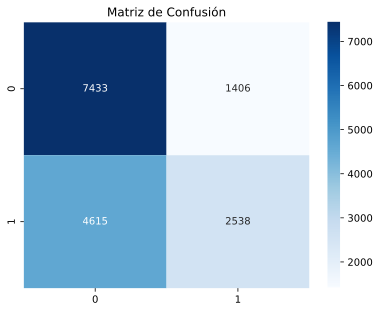

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de columnas
X = df[[
    # 'region',
    # 'educa',
    'ingreso',
    'hrs_sem',
    'temporada_trabajo',
    'rol_laboral',
    # 'tipoContrato',
    # 'jornadaLaboral',
    'tipoHorario'
]]

# Codificar las variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Variable dependiente: Sexo (codificada como 0 y 1)
y = df['sexo']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predicciones
y_pred = logreg.predict(X_test_scaled)

# Evaluación del modelo
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Verosimilitud del modelo completo (LL_full)
LL_full = logreg.score(X_test_scaled, y_test)

# Verosimilitud del modelo nulo (LL_null)
# El modelo nulo predice siempre la clase más frecuente
y_null = np.full_like(y_test, fill_value=y_test.mode()[0])
LL_null = np.mean(y_null == y_test)

# Cálculo del pseudo-R^2 de McFadden
pseudo_r2 = 1 - (LL_full / LL_null)

print(f"\nMcFadden's Pseudo-R^2: {pseudo_r2:.4f}")

# Matriz de confusión visual
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()


Mean Squared Error: 0.23421157350926028
R^2 Score: 0.052623614741643676


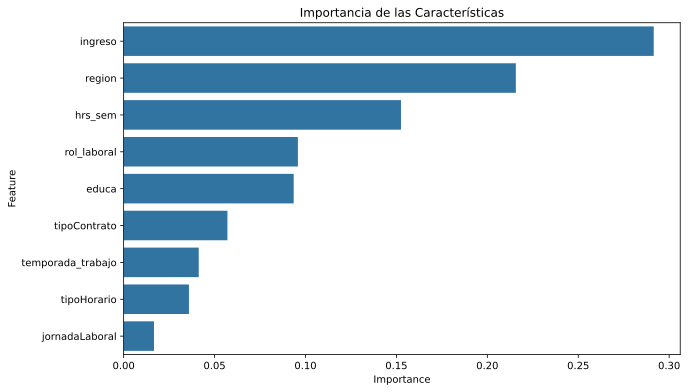

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de columnas
X = df[[ 
    # 'sexo',
    'region',
    'educa',
    'hrs_sem',
    'temporada_trabajo',
    'rol_laboral',
    'tipoContrato',
    'jornadaLaboral',
    'tipoHorario',
    'ingreso',
]]

# Variable objetivo
y = df['sexo']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predicciones
y_pred = rf.predict(X_test_scaled)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualización: Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

# Obtener probabilidades (importancia de las características)
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualización de la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características')
plt.show()
